In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
file_path = "phone_usage_india.csv"
data = pd.read_csv(file_path)

In [3]:
data['Gender'] = data['Gender'].astype('category')
data['OS'] = data['OS'].astype('category')
data['Primary Use'] = data['Primary Use'].astype('category')

In [4]:
Q1 = data['Monthly Recharge Cost (INR)'].quantile(0.25)
Q3 = data['Monthly Recharge Cost (INR)'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (data['Monthly Recharge Cost (INR)'] < (Q1 - 1.5 * IQR)) | (data['Monthly Recharge Cost (INR)'] > (Q3 + 1.5 * IQR))
data_outliers = data[outlier_condition]

In [5]:
data['Age Group'] = pd.cut(data['Age'], bins=[10,20,30,40,50,60,70], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70'])

In [6]:
age_group_stats = data.groupby('Age Group').agg({
     'Screen Time (hrs/day)': 'mean',
    'Data Usage (GB/month)': 'mean',
    'E-commerce Spend (INR/month)': 'mean'
})

C:\Users\sagar\AppData\Local\Temp\ipykernel_22308\2748524272.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = data.groupby('Age Group').agg({


In [7]:
age_group_stats

,Screen Time (hrs/day),Data Usage (GB/month),E-commerce Spend (INR/month)
Age Group,,,
10-20,6.594721,25.397101,4993.058849
20-30,6.545810,25.634482,5094.586792
30-40,6.595218,25.423726,5067.735681
40-50,6.553269,25.206747,5105.326883
50-60,6.464154,25.388809,5084.843127
60-70,NaN,NaN,NaN


### What is a Correlation Matrix?
#### A correlation matrix shows how strongly two variables are related using correlation values (between -1 and 1).

- 1.0	Perfect positive correlation (both increase together)	
- -1.0	Perfect negative correlation (one increases, the other decreases)	
- 0.0	No correlation (completely independent)

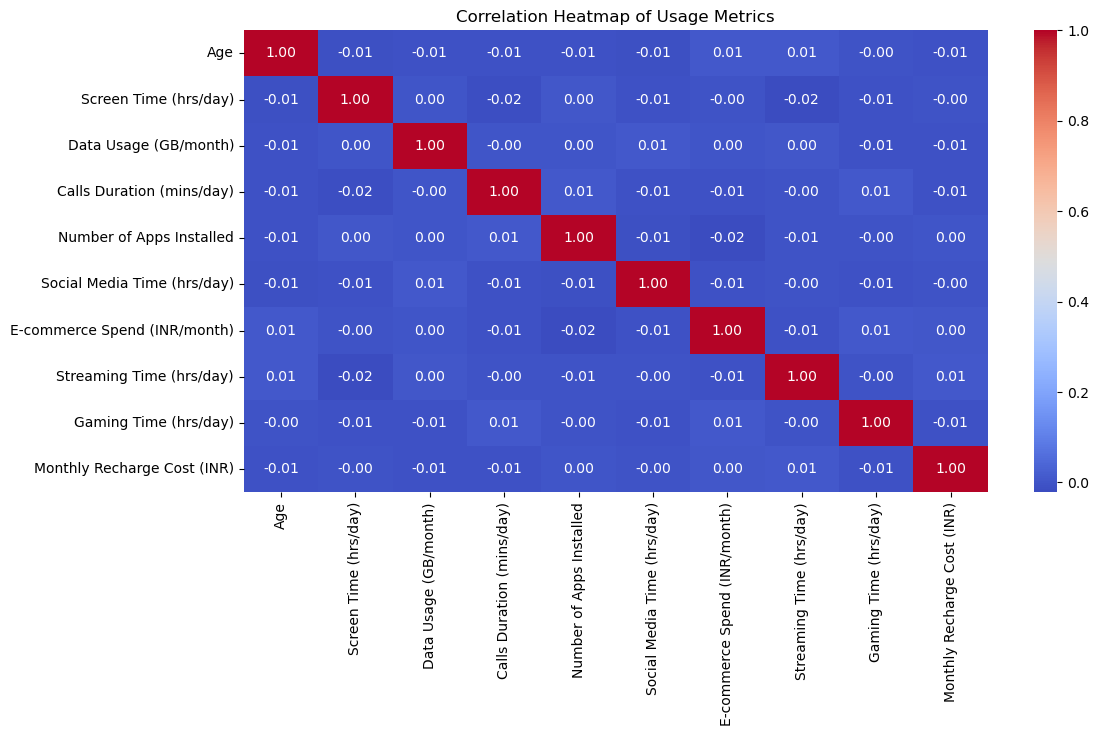

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Usage Metrics")
plt.show()

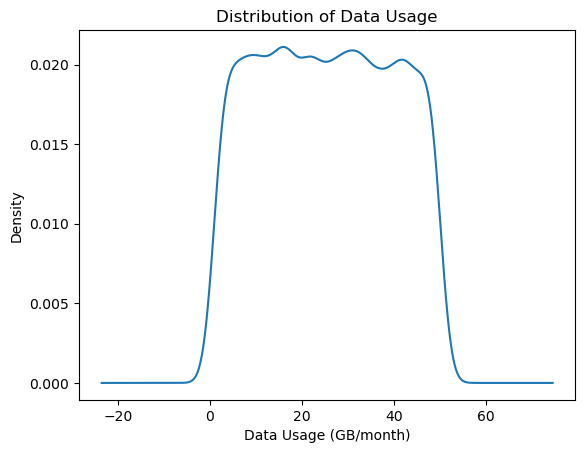

In [10]:
data['Data Usage (GB/month)'].plot(kind='kde', title='Distribution of Data Usage')
plt.xlabel("Data Usage (GB/month)")
plt.show()

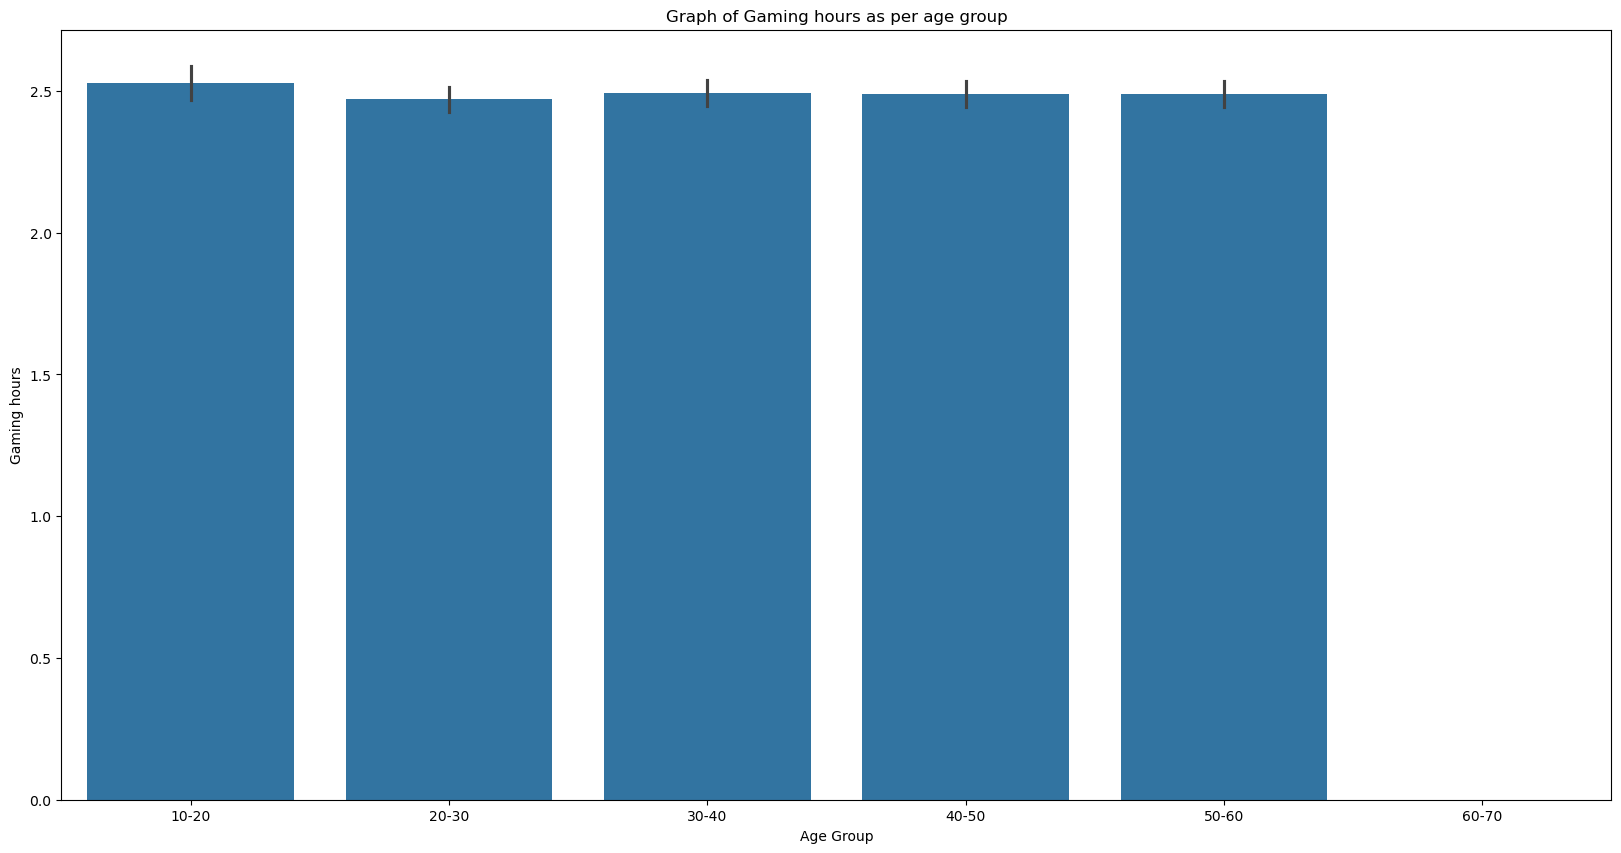

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x=data['Age Group'], y=data['Gaming Time (hrs/day)'])
plt.xlabel("Age Group")
plt.ylabel("Gaming hours")
plt.title("Graph of Gaming hours as per age group")
plt.show()

In [12]:
features = data[['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Gaming Time (hrs/day)']]
kmeans = KMeans(n_clusters=6, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

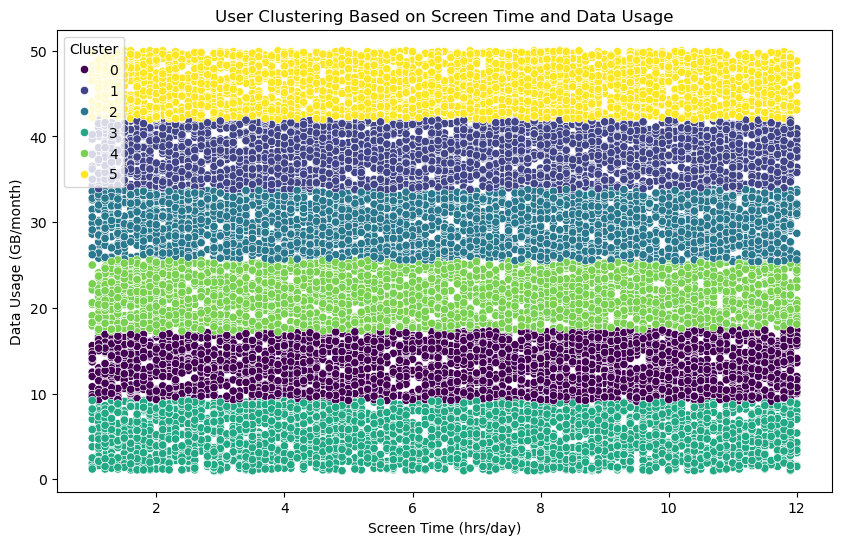

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Screen Time (hrs/day)'], y=data['Data Usage (GB/month)'], hue=data['Cluster'], palette='viridis')
plt.xlabel("Screen Time (hrs/day)")
plt.ylabel("Data Usage (GB/month)")
plt.title("User Clustering Based on Screen Time and Data Usage")
plt.show()